**This tutorial is written by Habibur Rahman, Graduate Research Assistant, School of Materials Engineering, Purdue University, West Lafayette, IN  email: `msehabibur@purdue.edu`**


---



 **Intrduction to Neural Network (NN)**



>A NN is typically organized into layers, with each layer consisting of a set of neurons that perform a specific task. The input layer receives the data, and the output layer produces the final prediction or classification. In between the input and output layers, there can be multiple hidden layers, which enable the neural network to learn complex relationships in the data. During training, the NN adjusts the weights of the connections between the neurons to minimize the error between the predicted output and the true output. This process is known as backpropagation, and it enables the NN to learn from examples and generalize to new data.

>To construct a neural network model for predicting Young's modulus from melting temperature and electrical resistance, we start with an input layer comprising two neurons: 'melt_temp' and 'elec_resistivity', which take in the respective input data. Following this, a simple hidden layer is introduced, consisting of two neurons named 'a1' and 'a2'. The definition of each neuron is straightforward yet critical for the model's function. Take neuron 'a1', for instance: it considers all possible inputs, multiplies them with weights 'w1' and 'w2', adds a bias 'b1', and then applies an activation function 'f1', which could be ReLU, tanh, or linear. This process of defining neurons and passing input data through them is known as forward propagation, where the model generates predictions and computes the Root Mean Square Error (RMSE) to assess its accuracy. If the RMSE is not within acceptable limits, the model enters a phase called back propagation. In this phase, it revisits the first hidden layer to adjust the weights and bias, thereby continuously reducing the RMSE and refining the model's predictive accuracy. This iterative process of forward and back propagation is the essence of the model's learning mechanism, enabling it to make increasingly accurate predictions based on the input melting temperature and electrical resistance data.

>Note: Weights are the values assigned to the connections between neurons in a neural network. They determine the strength of the connection between two neurons and determine how much of the signal from one neuron will be passed on to the next. During training, the weights are adjusted to optimize the performance of the network. In simple word, how much influence the input would have on the ouput. Biases, on the other hand, are values added to the output of each neuron. They allow the network to account for input signals that may not be present or may be weak. During training, biases are adjusted to optimize the performance of the network. In a simple manner, bias is used to offest the output of the neuron.


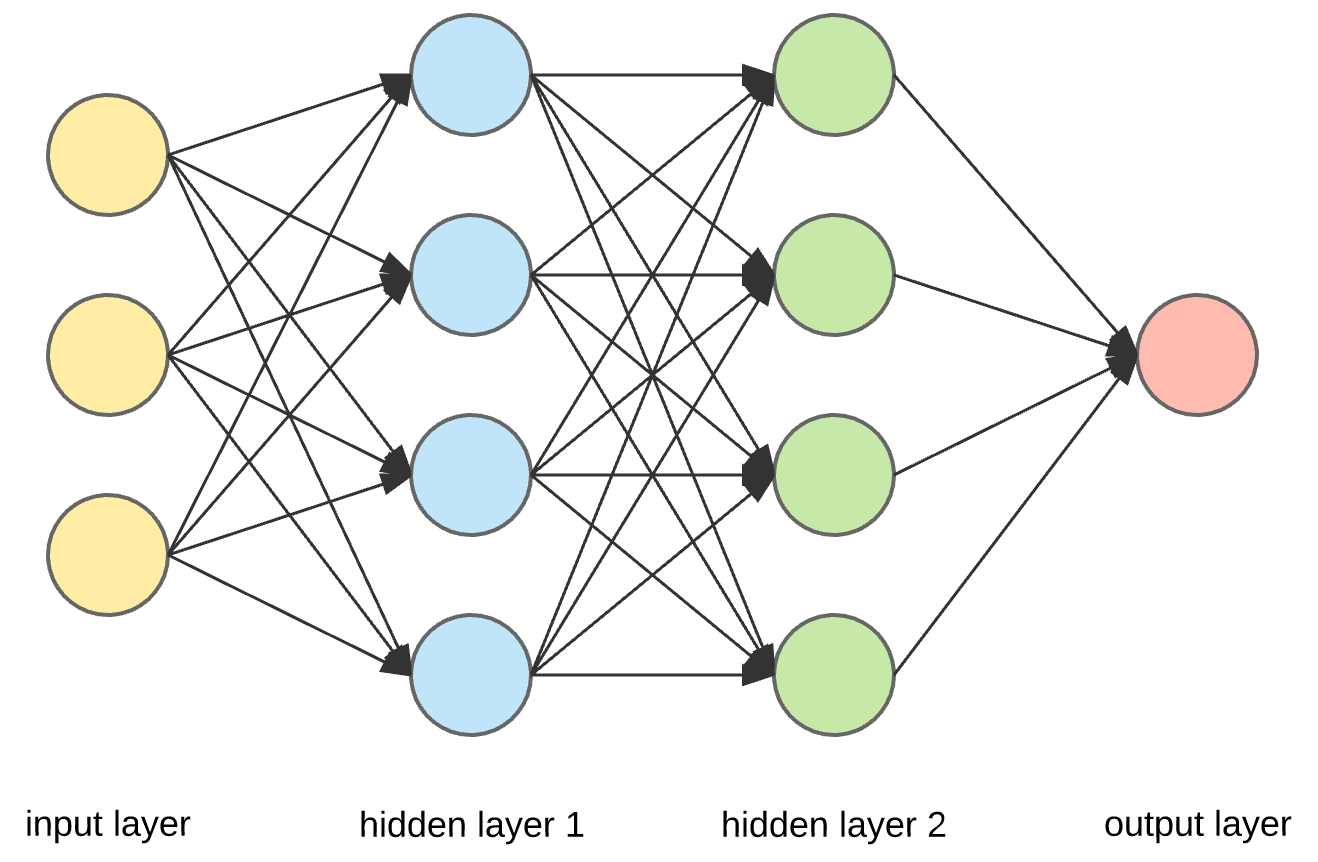

In [1]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DeepMSE/Introduction_to_Neural_Network/1.png', width=500, height=300)

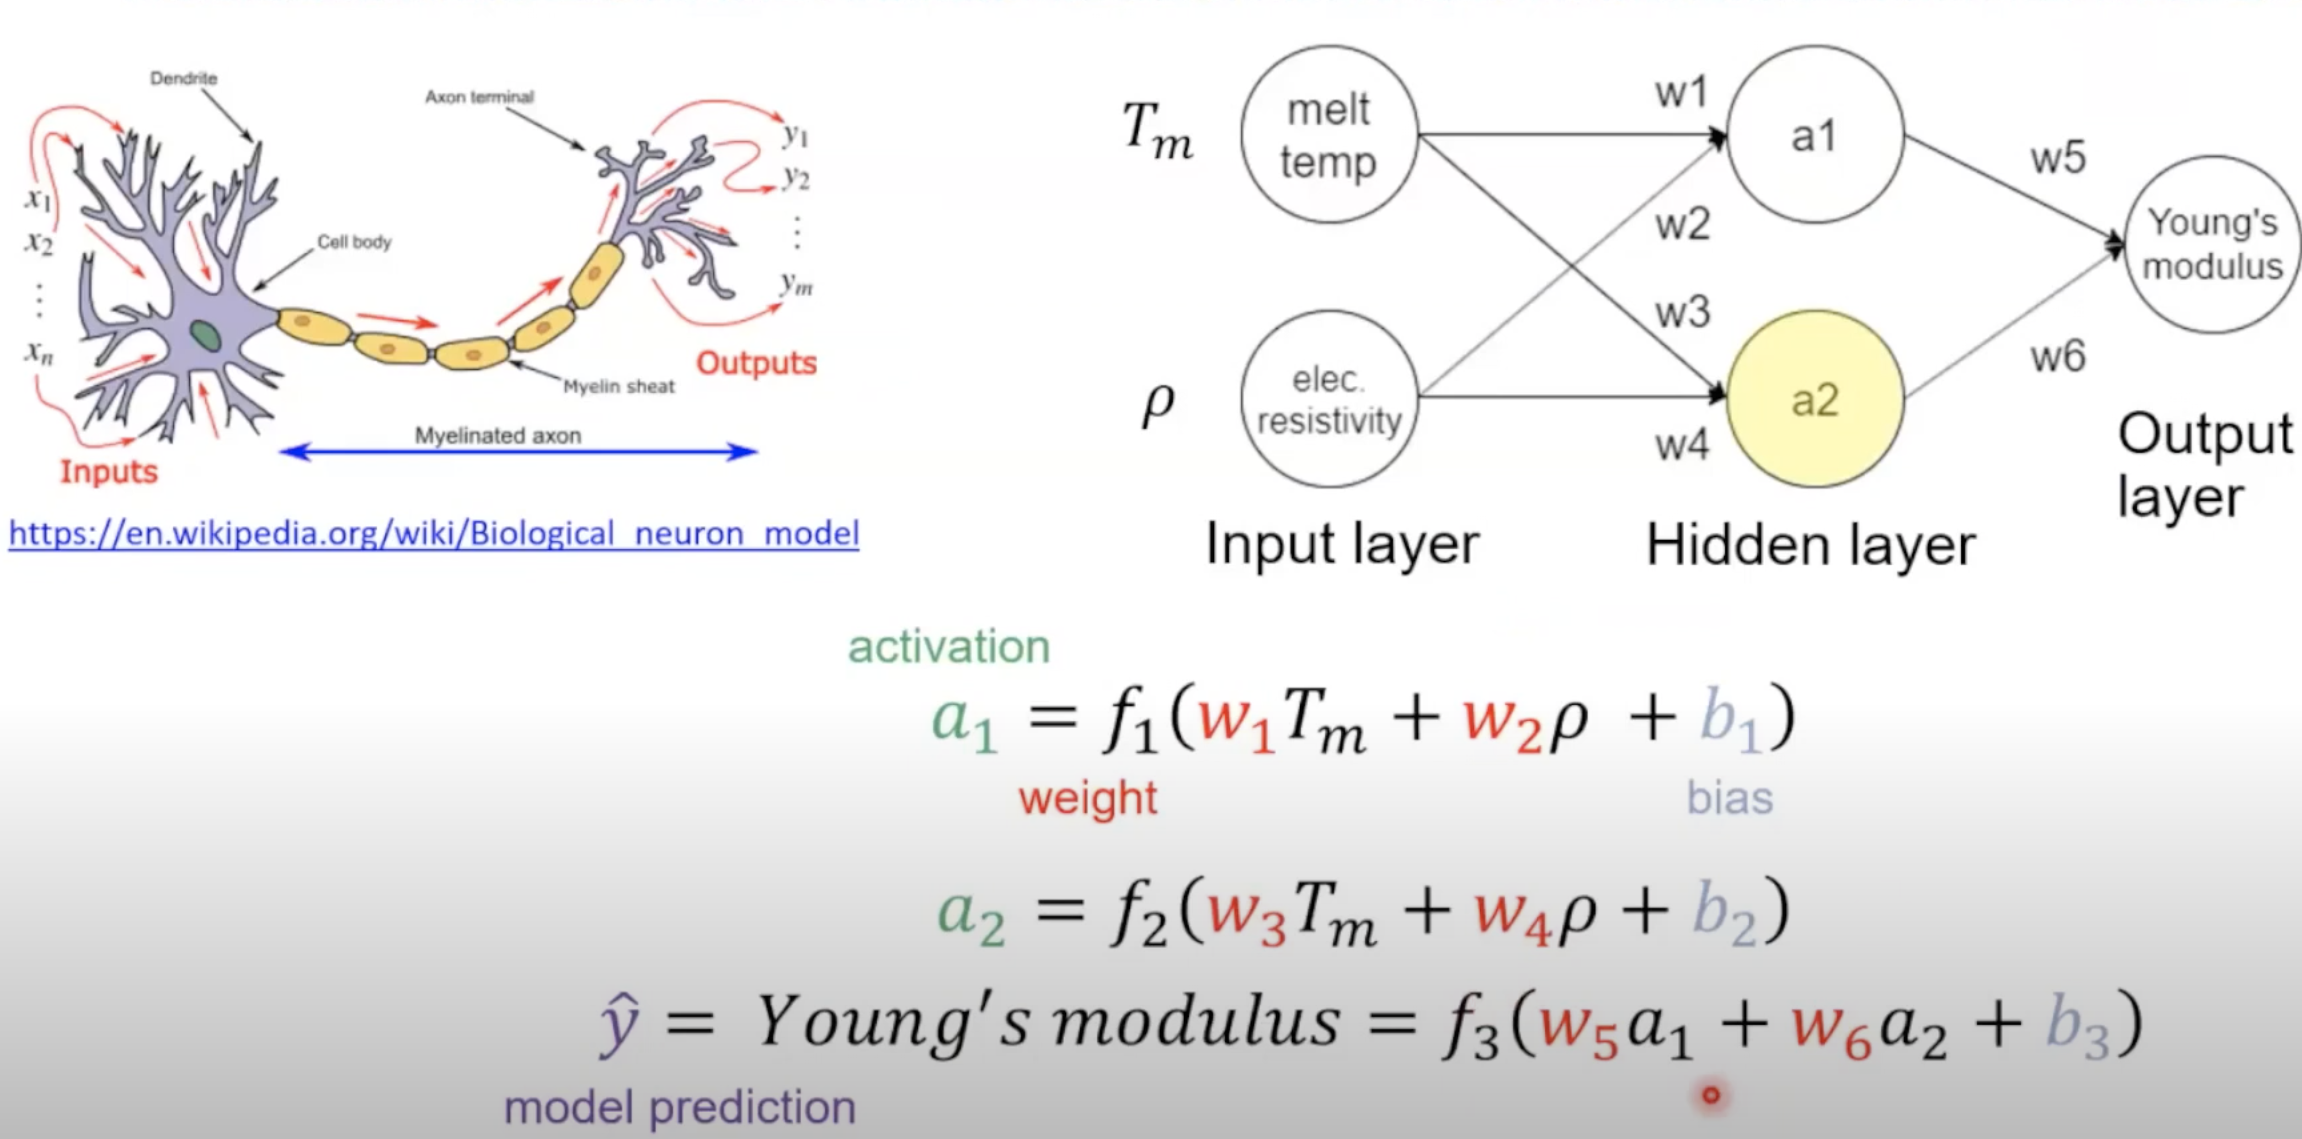

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DeepMSE/Introduction_to_Neural_Network/2.png', width=600, height=300)

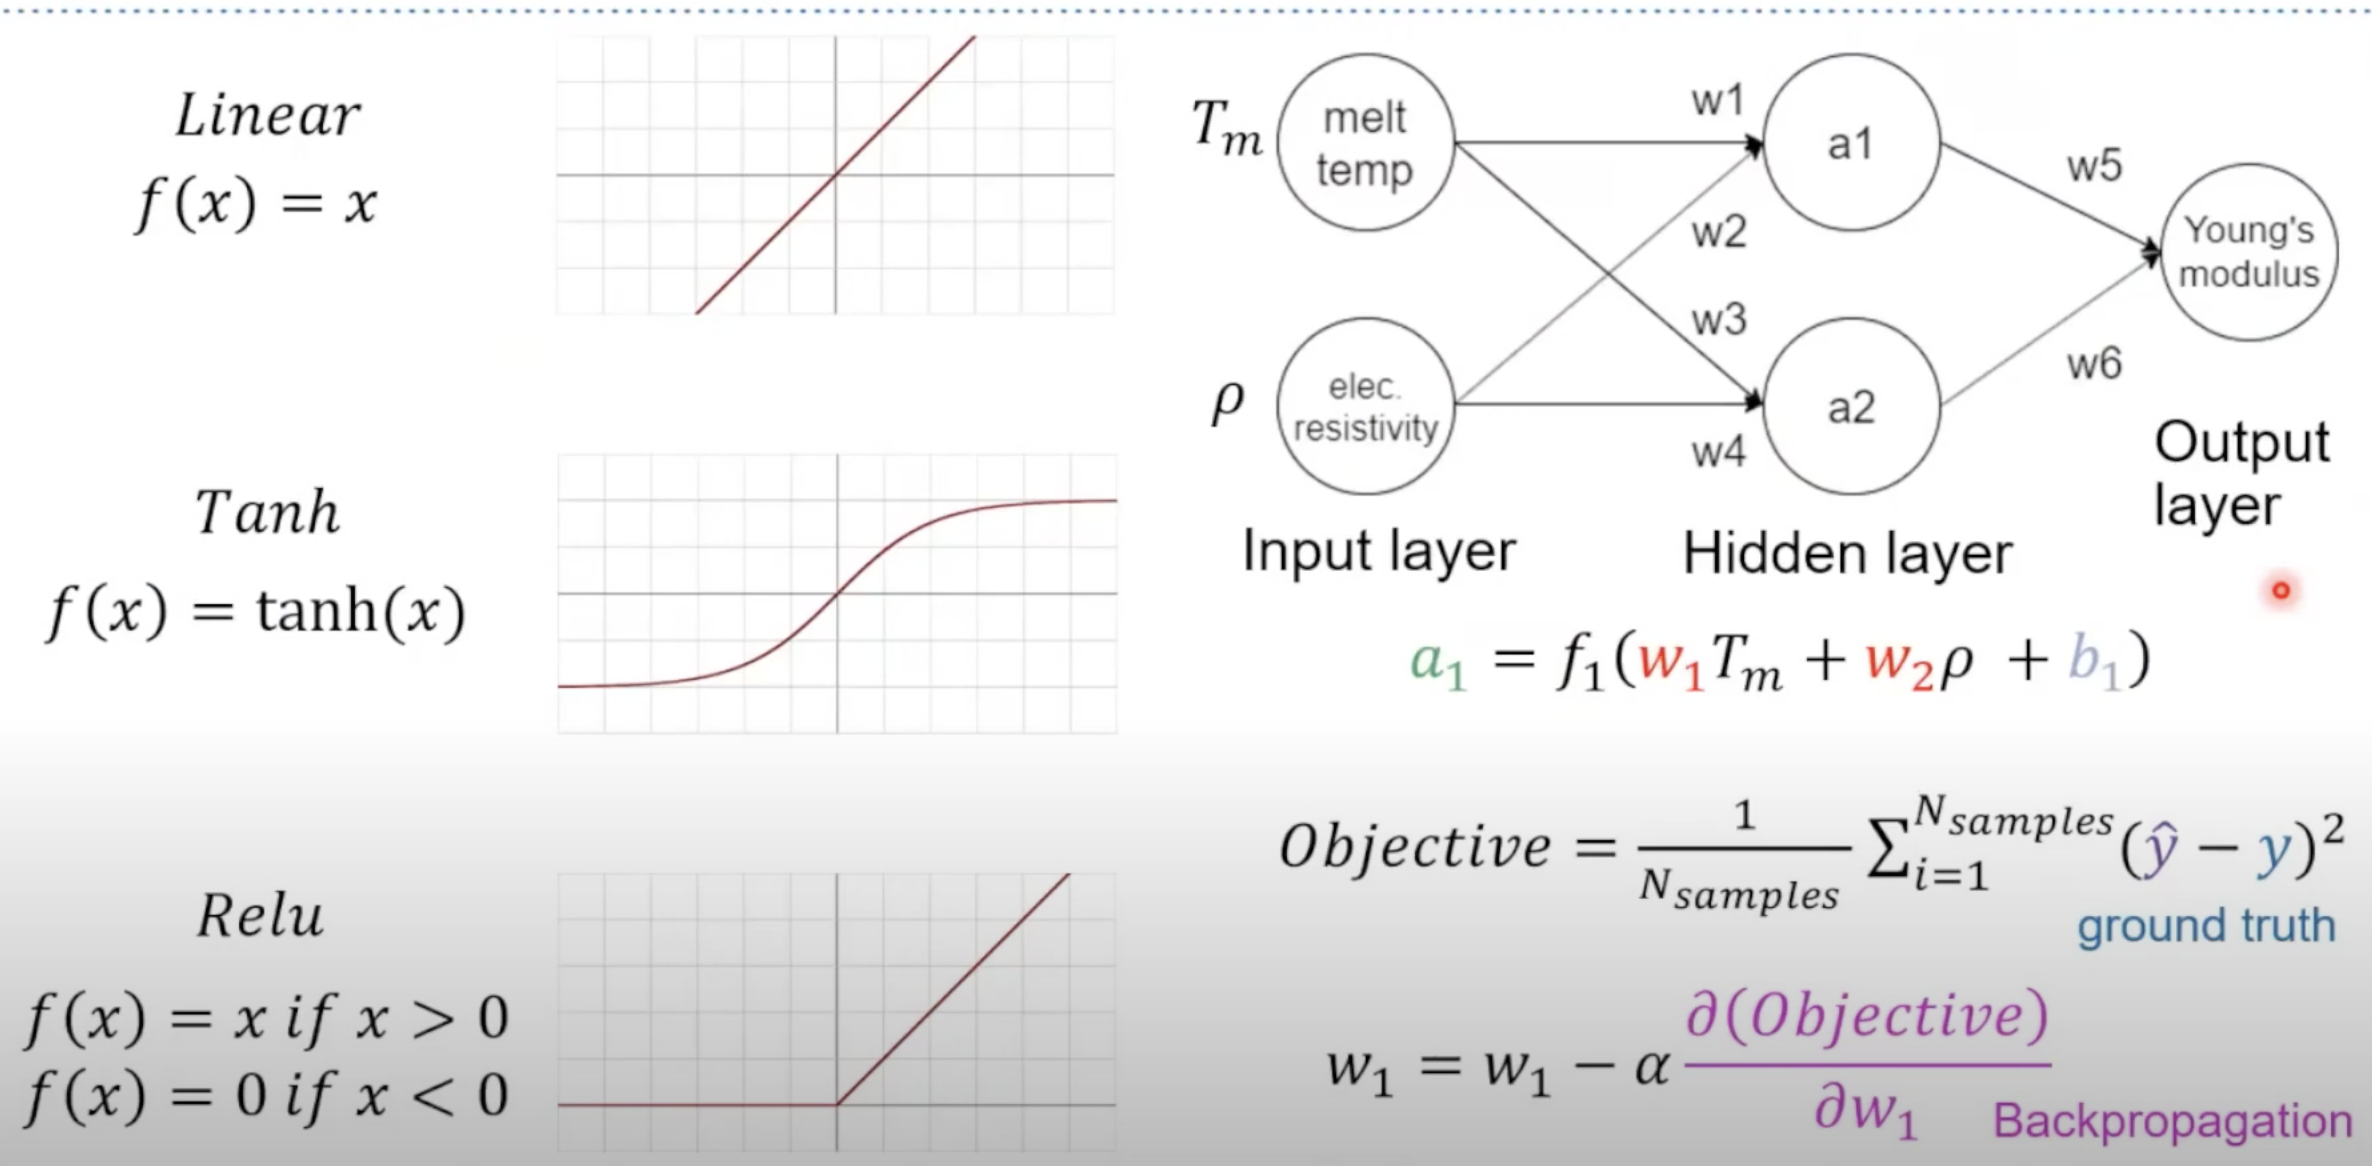

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DeepMSE/Introduction_to_Neural_Network/3.png', width=500, height=300)

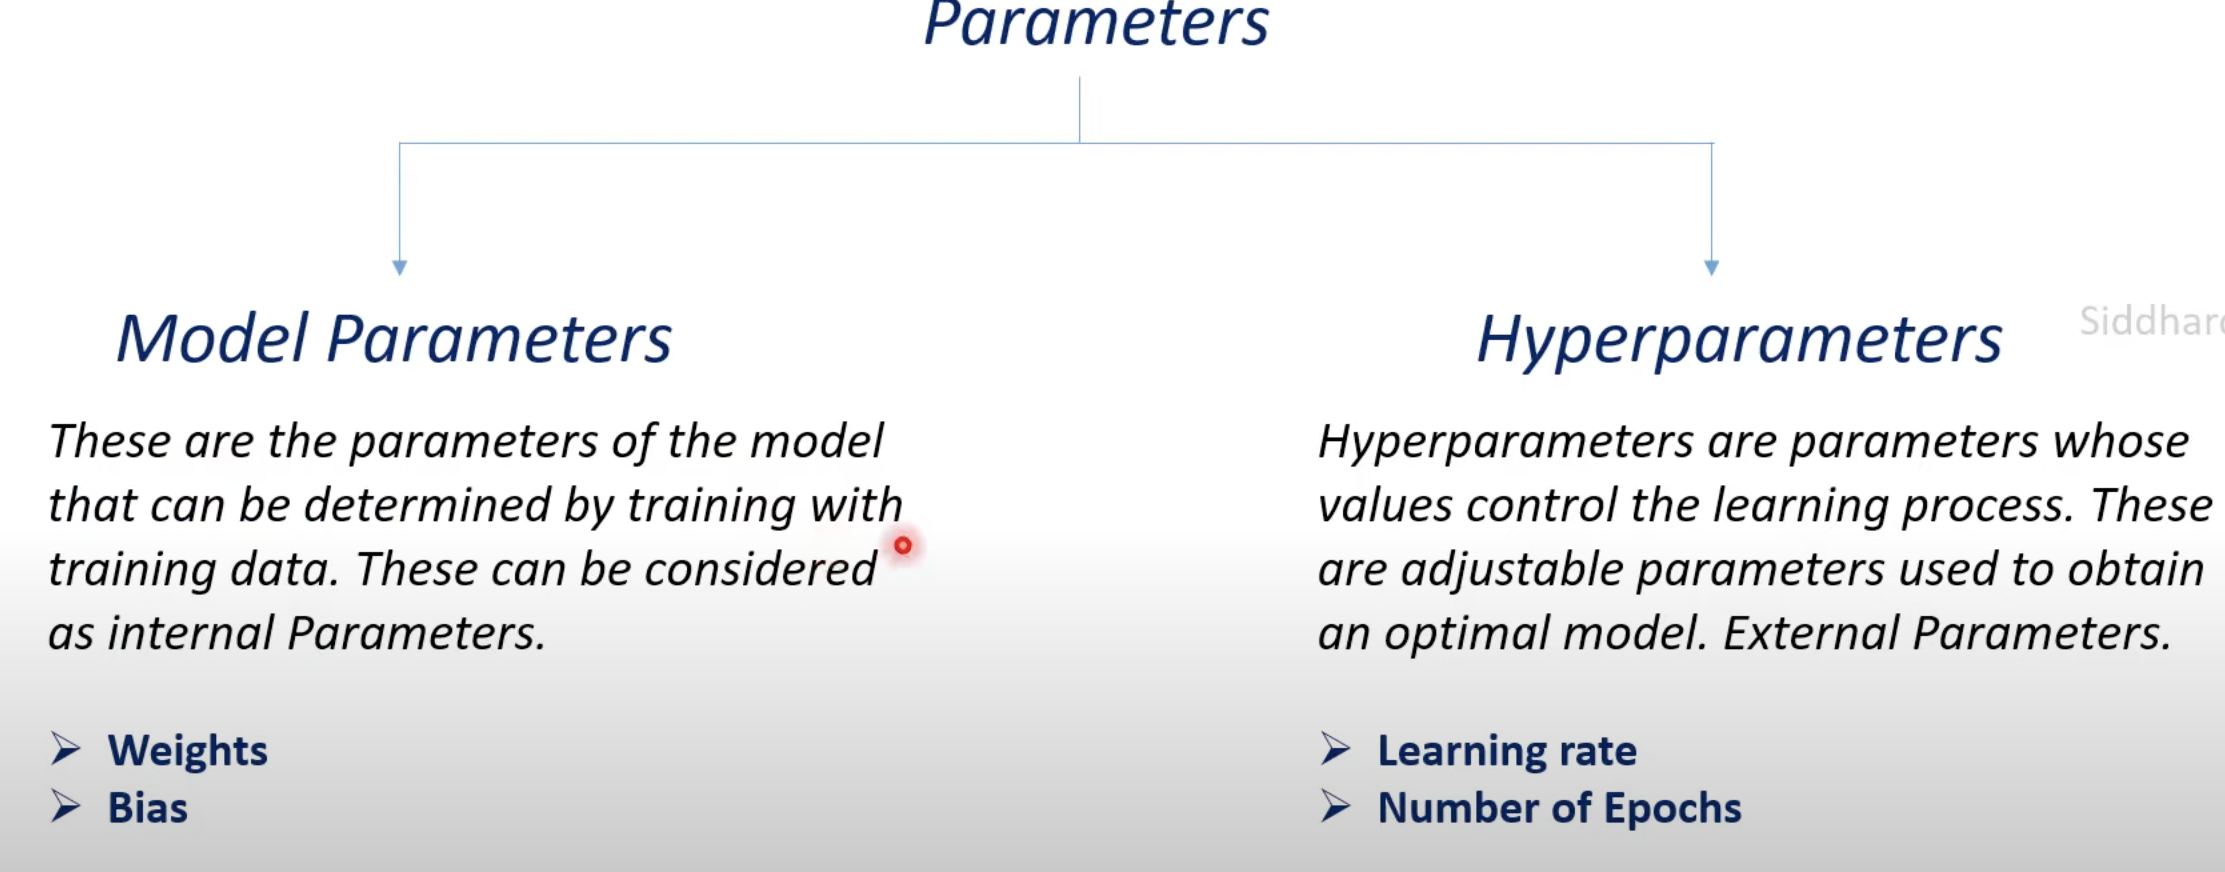

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DeepMSE/Introduction_to_Neural_Network/4.png', width=700, height=300)

**Keras and Tensorflow**

>Keras and TensorFlow are both open-source software libraries used for machine learning and artificial intelligence. TensorFlow is a powerful and flexible framework that was developed by Google, and it allows developers to build and train machine learning models for a wide range of applications, including image and speech recognition, natural language processing, and many more. It supports both CPU and GPU computing and allows developers to write models in Python, C++, and other programming languages. Keras, on the other hand, is a high-level API that simplifies the process of building neural networks. It can run on top of TensorFlow or other deep learning frameworks such as Theano and CNTK. Keras provides a user-friendly interface for building and training deep learning models, allowing developers to easily create complex models with just a few lines of code.

**Let's now create a simple NN model for the california house price dataset!**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/drive/MyDrive/DeepMSE/Introduction_to_ML/california_housing.csv')
X = data[['total_rooms', 'latitude', 'total_bedrooms']] # Features
y = data['median_house_value'] # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# This line of code creates a neural network model using TensorFlow's Keras API.
# tf.keras.Sequential() creates a linear stack of layers that can be used to build a feedforward neural network.
# tf.keras.layers.Dense() is a fully connected layer that applies a linear transformation to the input data.
# In this case, we have two dense layers: The first layer has 10 neurons, expects an input shape of (3,), and applies a ReLU activation function.
# The input_shape parameter specifies the shape of the input data.
# The last layer has 1 neuron and specify a sigmoid activation function. This layer represents the output layer of the neural network.
# Also, we have a a hidden layer, that has 12 neuros, and apply a tanh activiation function
# batch_size: Batch size is a hyperparameter that specifies the number of examples (data points) used in each iteration (step) of the training process of a neural network.
# During training, the data is divided into batches, and each batch is used to update the weights of the neural network.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(3,), activation='relu'),
    tf.keras.layers.Dense(12, activation='linear'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#model.compile() is a method that configures the model for training. It takes three important arguments:

#loss: This is the objective function that the model will try to minimize during training. In this case, we're using the mean squared error (MSE) as the loss function.
#optimizer: This is the optimization algorithm that will be used to update the weights of the neural network during training.
#In this case, we're using the Adam optimizer with a learning rate of 0.01.
#Adam is an adaptive learning rate optimization algorithm that is well-suited for neural networks.
#metrics: These are additional evaluation metrics that we want to monitor during training. In this case, we're using the MSE as the evaluation metric, which is the same as the loss function.
#By compiling the model with these arguments, we are setting up the training process to minimize the mean squared error loss using the Adam optimizer with a learning rate of 0.01, and we are monitoring the MSE as the evaluation metric.

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mse'])

# Train the model on the training data with validation set
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


# Evaluate the model on the training and validation sets
train_loss, train_mse = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_mse = model.evaluate(X_val, y_val, verbose=0)
train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)
print('RMSE on training set:', train_rmse)
print('RMSE on validation set:', val_rmse)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE on test set:', rmse)


**Hyperparameter Optimization**
> Grid Search CV: Grid search cross-validation (Grid Search CV) is a technique used in machine learning to tune hyperparameters of a model in order to obtain the best possible performance. Grid search works by specifying a grid of hyperparameter values to be evaluated, and then performing a cross-validation procedure for each combination of hyperparameters in the grid. Cross-validation involves splitting the training data into several subsets and using each subset in turn to evaluate the performance of the model. This helps to avoid overfitting and obtain a more reliable estimate of the model's performance. Once the cross-validation is completed, the hyperparameters that yield the best performance are selected. This approach is computationally expensive, as it requires training and evaluating the model for each combination of hyperparameters in the grid. However, it can be very effective in finding the optimal set of hyperparameters for a given model, especially when the number of hyperparameters is relatively small.

>Randomized Search CV: Randomized search works by specifying a range of hyperparameter values to be evaluated, and then randomly sampling from that range to obtain a set of hyperparameters for each iteration of the search. Similar to grid search, cross-validation is performed for each combination of hyperparameters in the randomized search. The advantage of using randomized search over grid search is that it can be much more efficient for hyperparameter tuning when the number of hyperparameters is large. Randomized search has a better chance of finding a good set of hyperparameters in a smaller number of iterations, as it randomly samples hyperparameters from the specified range, rather than exhaustively searching every possible combination.

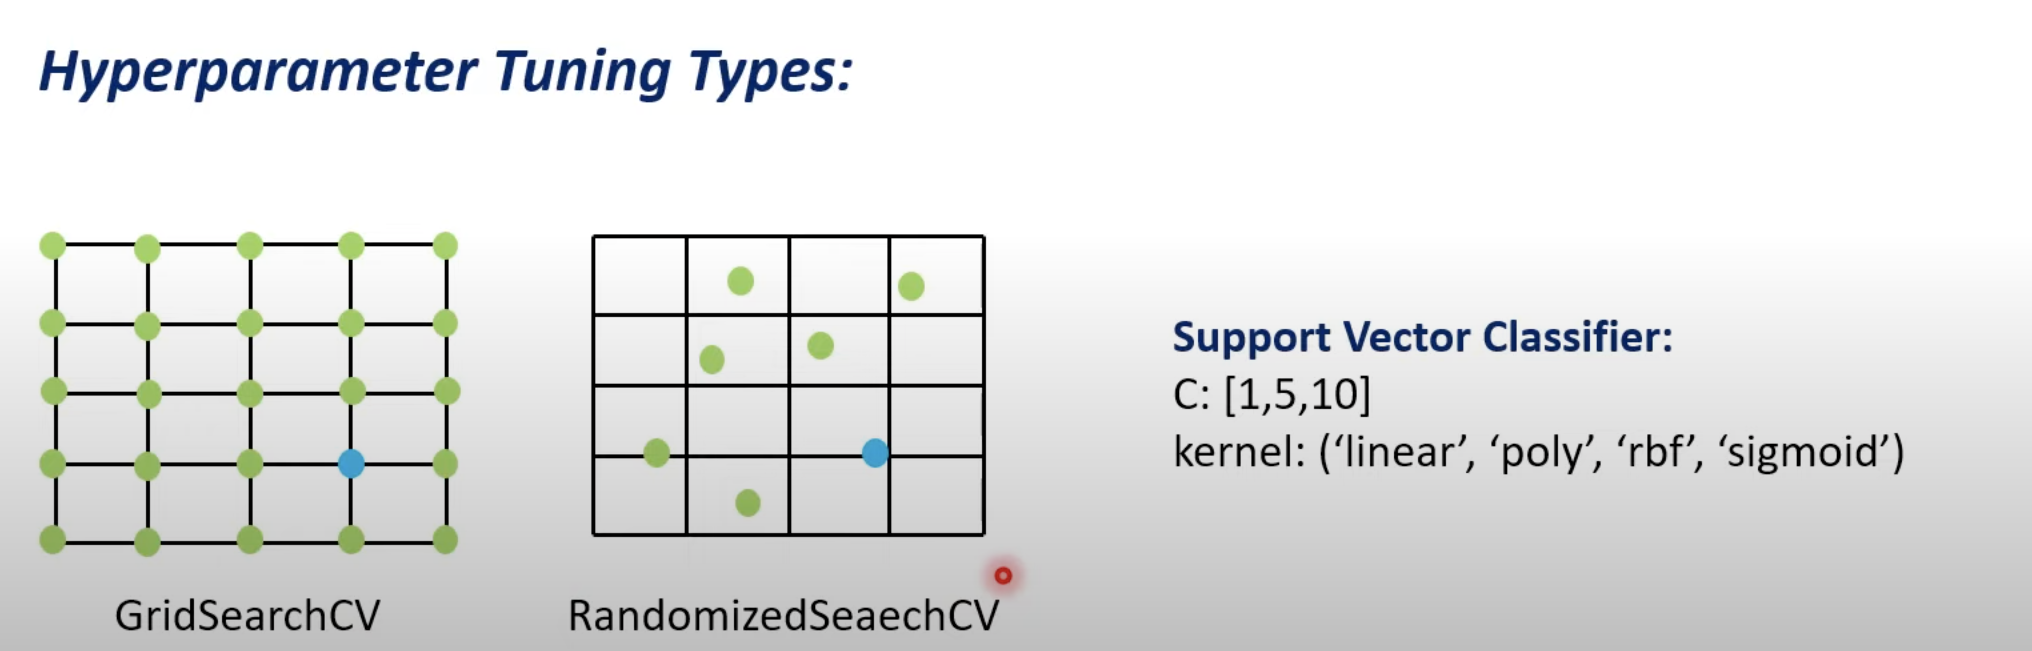

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DeepMSE/Introduction_to_Neural_Network/5.png', width=800, height=300)

**Convoluational Neural Network**

>A Convolutional Neural Network (CNN) is a deep learning model that is commonly used for image classification, object detection, and other computer vision tasks. The key feature of a CNN is that it uses convolutional layers to automatically learn and extract features from the input data. The CNN consists of multiple layers, each of which performs a specific operation on the input data. The layers can be grouped into three main types:

>Convolutional layers: These layers apply a set of filters (or kernels) to the input data and produce a set of output feature maps. Each filter is learned during training to detect specific patterns or features in the input data.

>Filter: A filter (also known as a kernel or a feature detector) is a small matrix that is convolved with an input volume to produce an output volume. The filter is moved across the input volume, performing element-wise multiplication with the input at each position, and summing the results to produce a single output value. The filter is typically learned during training to detect specific features or patterns in the input data.

>Stride: Stride refers to the number of pixels that the filter moves between each convolution operation. A stride of 1 means that the filter moves one pixel at a time, while a stride of 2 means that the filter moves two pixels at a time. A larger stride reduces the size of the output volume and can help reduce computation time and memory usage in the network.

>Padding: Padding is the process of adding extra pixels around the edges of the input volume to ensure that the output volume has the same dimensions as the input volume. Padding can be added in different ways, such as zero-padding or reflection padding. Zero-padding is a common approach where extra pixels are added with a value of zero, and it can help preserve the spatial information in the input volume.

>Pooling: Pooling is a downsampling operation that reduces the spatial size of the input volume by taking the maximum or average value of a small region (usually a 2x2 or 3x3 square) of the input. Pooling helps reduce the dimensionality of the input volume, and it can also help make the network more robust to small variations in the input data.

>Fully connected layers: These layers take the flattened output from the previous layers and use it to classify the input data into one or more classes. The fully connected layers can have multiple neurons and are often used for the final classification step in the network. During training, the CNN adjusts the weights of the filters in the convolutional layers using backpropagation and gradient descent to minimize the error between the predicted and actual labels of the training data. Some important terms:

>In summary, filters, stride, padding, and pooling are all important operations in CNNs that help extract features and reduce the dimensionality of the input data, leading to improved performance in many computer vision tasks. The formula between input and output matrix in CNN Ouput: (Input-K+2P/S), where K, P and S stand for size of kernal, padding and stride.


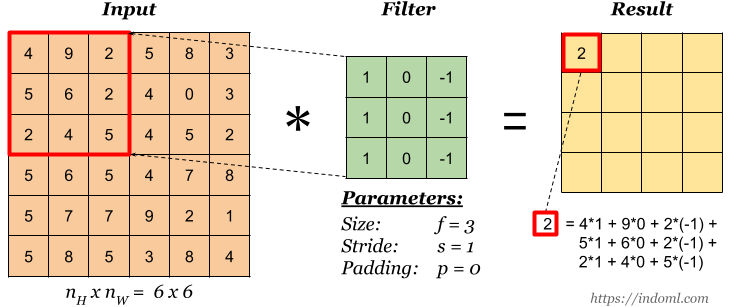

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DeepMSE/Introduction_to_Neural_Network/6.png', width=800, height=300)

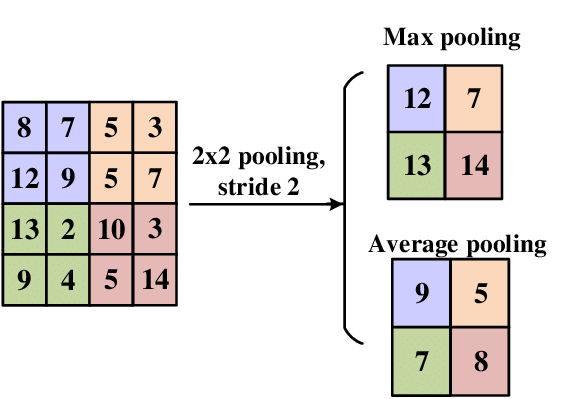

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DeepMSE/Introduction_to_Neural_Network/7.png', width=500, height=300)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('/content/drive/MyDrive/DeepMSE/Introduction_to_ML/california_housing.csv')
X = data[['total_rooms', 'latitude', 'total_bedrooms']].values # Features
y = data['median_house_value'].values # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape input data for convolutional neural network
X_train = X_train.reshape(-1, 3, 1, 1)
X_test = X_test.reshape(-1, 3, 1, 1)

# Create convolutional neural network model using TensorFlow's Keras API
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), input_shape=(3,1,1), activation='relu', padding='same', strides=(1,1)),

    tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), input_shape=(3,1,1), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(1,1)), # Reducing the pooling size from (1,2) to (1,1)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1,)
])
#Overall, this flatten layer the output of the previous layer into a 1-dimensional tensor, which can then be used as input to a fully connected layer.
#For example, if the output of the previous layer was a tensor with a shape of (batch_size, 10, 10, 32), the Flatten layer would flatten it into a tensor with a shape of (batch_size, 10 * 10 * 32) = (batch_size, 3200).
#Adding more layers, more filters could potentially cause overfitting issue in a CNN
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mse'])
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Make predictions on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)


**Graph Neural Network**


>In mathematics and computer science, a graph is a collection of nodes (also called vertices) that are connected by edges. The nodes can represent any kind of entity or object, while the edges represent the relationships or connections between the nodes. Graphs can be used to model a wide variety of real-world systems and phenomena, such as social networks, transportation networks, chemical compounds, and more. They are also commonly used in computer science and data science for tasks such as optimization, clustering, and machine learning. One real world example of a graph is a social network. In a social network, the nodes represent individuals, and the edges represent the connections or relationships between them. For example, on Facebook, each user is represented as a node, and the connections between them are the friend relationships. Another example of a graph in the real world is a transportation network. In a transportation network, the nodes represent locations (such as cities or airports), and the edges represent the transportation links between them (such as roads, rail lines, or flight routes). For example, the subway system of a city can be represented as a graph, where each subway station is a node and the subway lines are the edges between them. Graphs are also used in chemistry to represent molecular structures, where the nodes represent atoms and the edges represent the chemical bonds between them. In this case, the properties of the molecules can be analyzed by examining the structure of the graph.

>GNN stands for Graph Neural Network. A GNN is a type of neural network that is designed to operate on graph structures. Unlike traditional neural networks that operate on grid-like structures (such as images or sequences), GNNs are able to capture the relationships and interactions between nodes in a graph. In a GNN, each node in the graph is associated with a vector representation, called a node embedding, which encodes its features and relationships with other nodes in the graph. The GNN applies a series of neural network layers to update these node embeddings based on their relationships with neighboring nodes in the graph.


In [ ]:
%%shell
jupyter nbconvert --to html /content/Introduction_to_Neural_Network.ipynb

[NbConvertApp] Converting notebook /content/Introduction_to_Neural_Network.ipynb to html
[NbConvertApp] Writing 4624924 bytes to /content/Introduction_to_Neural_Network.html
